## Modeling
#### Nesta fase os dados foram preparados para integração em modelos de machine learning na fase de Modeling
#### As séries temporais "male", "female", "young" e "adult" foram retiradas dos dados uma vez que o nosso objetivo é orientado para a série "all"
#### A coluna "date" também foi removida porque apenas serve para nos situarmos no tempo, para a divisão dos dados em antigos=treino, recentes=teste. Além disso a sua natureza única (única por observação) apenas iria trazer incerteza para os modelos.
#### Para lidar com os valores outliers foram criados 2 cenários:
<ul>
    <li><b>Com outliers</b> - Neste cenário os valores outliers não foram tratados</li>
    <li><b>Sem outliers s/ compensação</b> - Neste cenário os valores outliers foram tratados</li>

</ul>

#### Por fim os dados de cada cenário foram exportados para os respetivos ficheiros csv para poderem ser utilizados nas fases seguintes 

In [1]:
# Importar Libraries
library(tidyverse)
library(rminer)
library(forecast)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'rminer' was built under R version 3.6.3"Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [61]:
# Importar os dados
data <- read.csv(file = './exported data/dadosPrep.csv')

# Retirar a coluna X (Index)
data = data %>% select(-X)
head(data)

all,weather,maxtemp,RH,maxwind
2332,0,13,87,0
2801,0,14,94,45
2375,0,14,82,55
3447,1,13,78,0
4823,0,16,81,37
4978,0,16,73,0


## Multivariate Regression

### Spliting the dataset

In [62]:
# Separação dos índices do dataframe ordenada cronologicamente (porque os dados já estão em ordem cronológica), usando 250
# observações para treino e 7 para teste
H=holdout(data$all,ratio=7,mode="order")
H

# Seleção dos dados de Treino
train = data[H$tr,]
cat("Dados de treino:\n")
cat("Head: ", head(train$all),"\n")
cat("Length: ", length(train$all),"\n\n")

# Seleção dos dados de Teste
test = data[H$ts,]
cat("Dados de teste:\n")
cat("Head: ", head(test$all),"\n")
cat("Length: ", length(test$all))

$tr
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
[217] 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
[235] 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250

$itr
NULL

$val
NULL

$ts
[1] 251 252 253 254 255 256 257

Dados de treino:
Head:  2332 2801 2375 3447 4823 4978 
Length:  250 

Dados de teste:
Head:  4974 3228 3191 4153 4307 4660 
Length:  7

### Modelos de Regressão (ML)

#### Random Forest

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3764.005 3833.647 3695.257 3748.338 3259.948 4058.153 3768.615 
MAE: 971.12 
NMAE: 32.35 


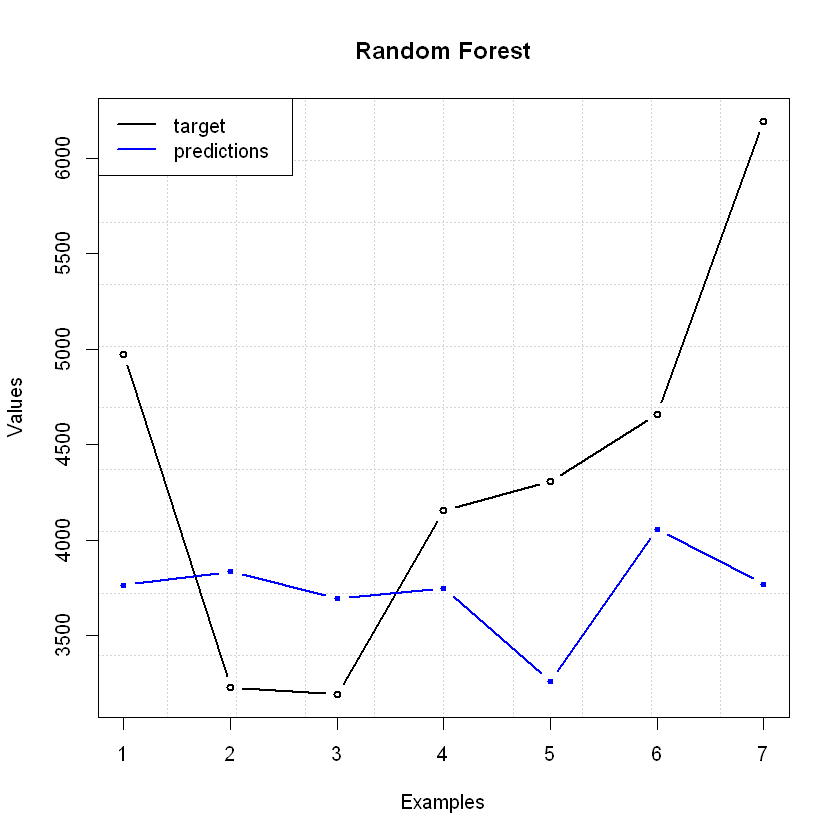

In [118]:
RF=fit(all~.,train,model="randomForest")
Target = test$all
cat("Target Values:",Target,"\n")

Pred = predict(RF,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="Random Forest")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

#### Multiple Linear Regression

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3187.233 3168.647 2932.272 3042.532 2638.799 3109.731 3099.146 
MAE: 1361.09 
NMAE: 45.34 


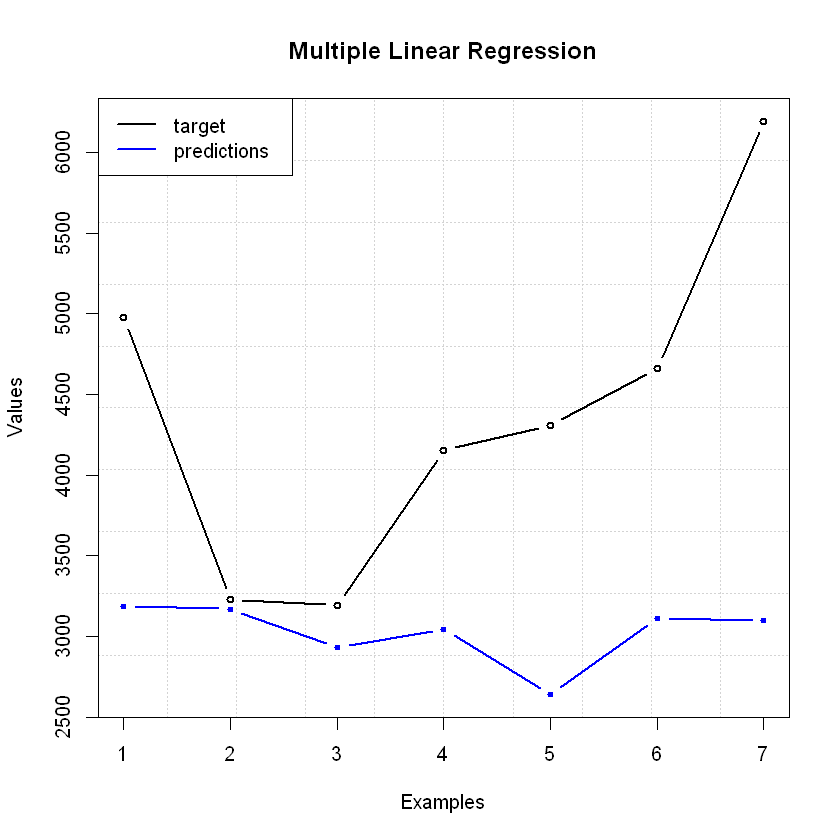

In [119]:
MR=fit(all~.,train,model="mr")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="Multiple Linear Regression")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

#### KSVM

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3722.704 4228.571 3186.75 3328.989 2643.094 3847.016 3775.707 
MAE: 1139.19 
NMAE: 37.95 


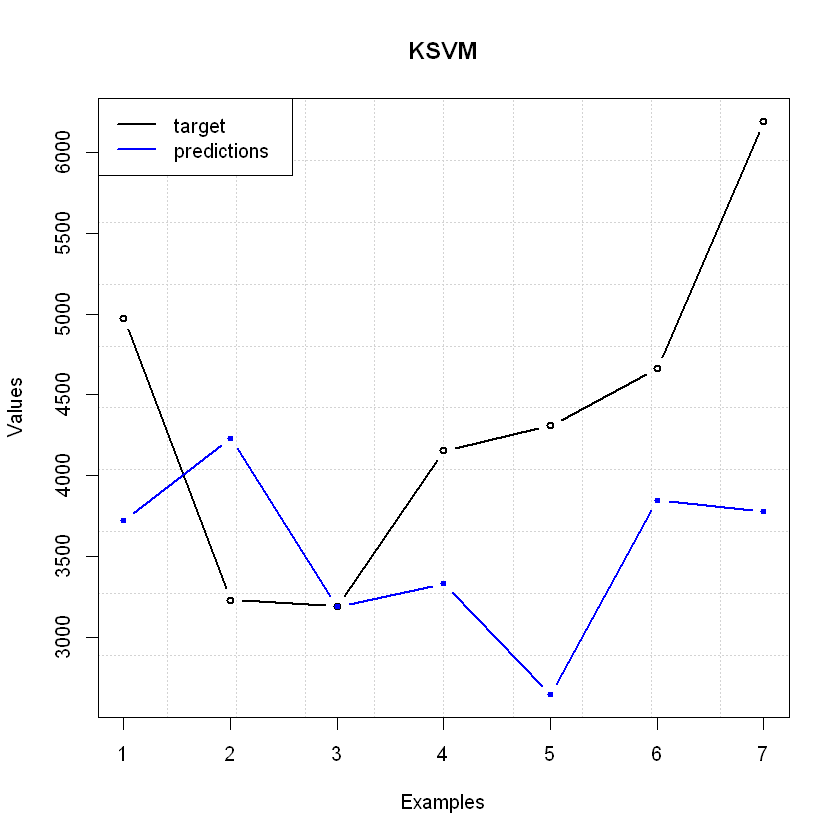

In [120]:
MR=fit(all~.,train,model="ksvm")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="KSVM")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

#### MLPE

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3566.065 3648.961 3393.688 3499.245 3587.181 3799.319 3790.773 
MAE: 952.58 
NMAE: 31.73 


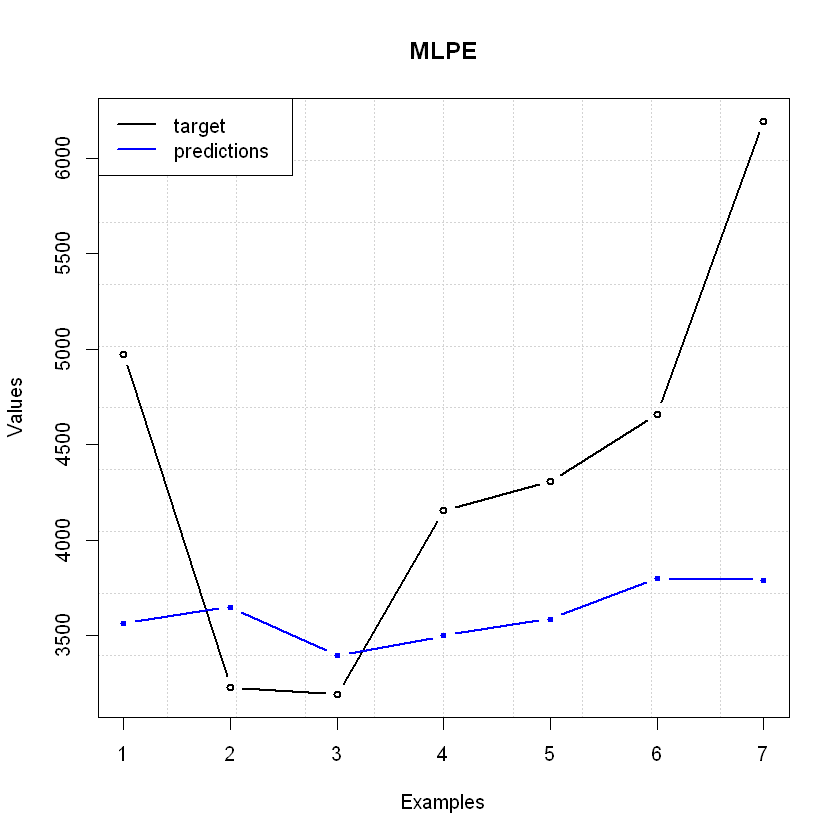

In [126]:
MR=fit(all~.,train,model="mlpe")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="MLPE")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

In [13]:
cs = CasesSeries(data$all,c(1:7))

In [11]:
NN=rminer::fit(y~.,cs[1:243,],model="mlpe",search="heuristic")
PNN=predict(NN,cs[244:250,])
PNN

cat("MAE=",mmetric(cs[244:250,]$y,PNN,metric="MAE",val=srange),"\n")

[1] 5127.838 2990.907 3378.745 6604.357 4185.084 8496.710 4444.319

MAE= 1248.191 


In [17]:
cs[244:250,]$y

[1] 4974 3228 3191 4153 4307 4660 6193

In [8]:
NN=rminer::fit(all~.,train,model="mlpe",search="heuristic")
PNN=predict(NN,test)
PNN

cat("MAE=",mmetric(test$all,PNN,metric="MAE",val=srange),"\n")

[1] 3526.195 3526.195 3526.195 3526.195 2977.921 3526.195 3526.195

MAE= 1119.67 


In [ ]:
# Gráfico
txt=paste("Neural Network (SMAPE):")
mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main=txt)

## Time Series Forecast

In [38]:
Test=7 # H, the number of multi-ahead steps, adjust if needed
S=7 # step jump: set in this case to 4 months, a quarter
Runs=7 # number of growing window iterations, adjust if needed

In [39]:
# forecast:
W=(length(data$all)-Test)-(Runs-1)*S # initial training window size for the ts space (forecast methods)

# rminer:
timelags=c(1:7) # 1 previous month, 12 and 13 previous year months, you can test other combinations, such as 1:13
D=CasesSeries(data$all,timelags) # note: nrow(D) is smaller by max timelags than length(d1)
W2=W-max(timelags) # initial training window size for the D space (CasesSeries, rminer methods)

YR=diff(range(data$all)) # global Y range, use the same range for the NMAE calculation in all iterations

ev2=vector(length=Runs) # error vector for "mlpe"

trinit=1

### Growing Window

In [59]:
for(b in 1:Runs)
{
  H2=holdout(D$y,ratio=Test,mode="incremental",iter=b,window=W2,increment=S)    
  M2=fit(y~.,D[H2$tr,],model="mlpe")
  Pred2=lforecast(M2,D,start=(length(H2$tr)+1),Test)
  ev2[b]=mmetric(y=data$all[H$ts],x=Pred2,metric="NMAE",val=YR)
}

SMAPE:  18.89 
MAE:  837.04 
NMAE:  27.88 


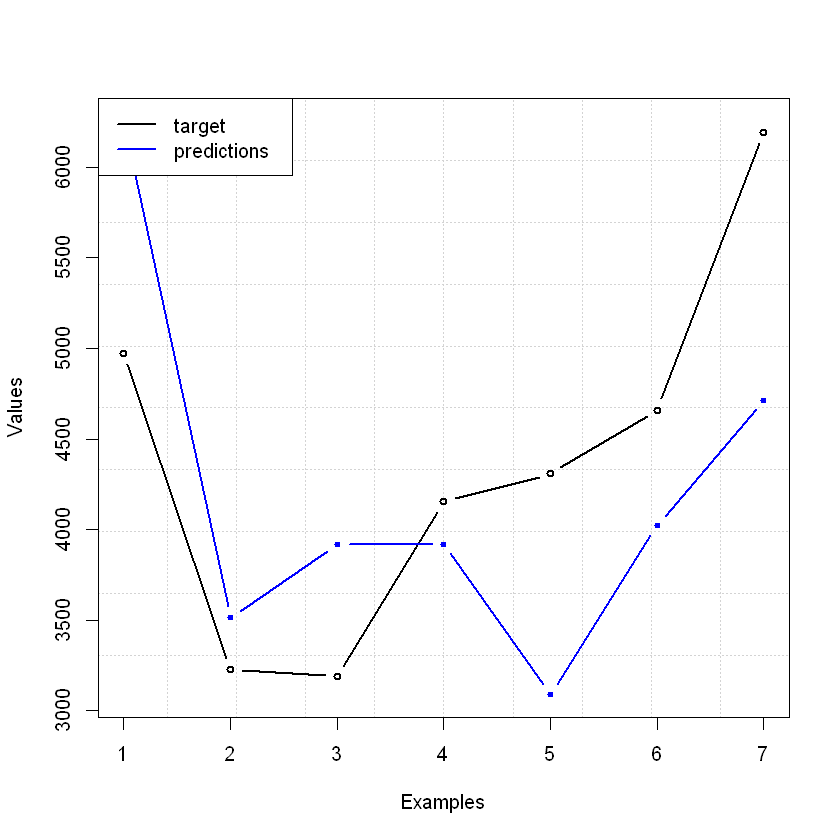

In [60]:
Target = data$all[H$ts]

cat("SMAPE: ",round(mmetric(Target,Pred2,metric="SMAPE"),2),"\n")
cat("MAE: ",round(mmetric(Target,Pred2,metric="MAE"),2),"\n")
cat("NMAE: ",round(mmetric(Target,Pred2,metric="NMAE"),2),"\n")

# last iteration predictions:
mgraph(data$all[H$ts],Pred2,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")))

### Rolling Window

In [52]:
for(b in 1:Runs)
{
  H2=holdout(D$y,ratio=Test,mode="rolling",iter=b,window=W2,increment=S)   
  M2=fit(y~.,D[H2$tr,],model="mlpe")
  Pred2=lforecast(M2,D,start=(length(H2$tr)+1),Test)
  ev2[b]=mmetric(y=data$all[H$ts],x=Pred2,metric="NMAE",val=YR)
}

SMAPE:  27.14 
MAE:  1097.85 
NMAE:  36.57 


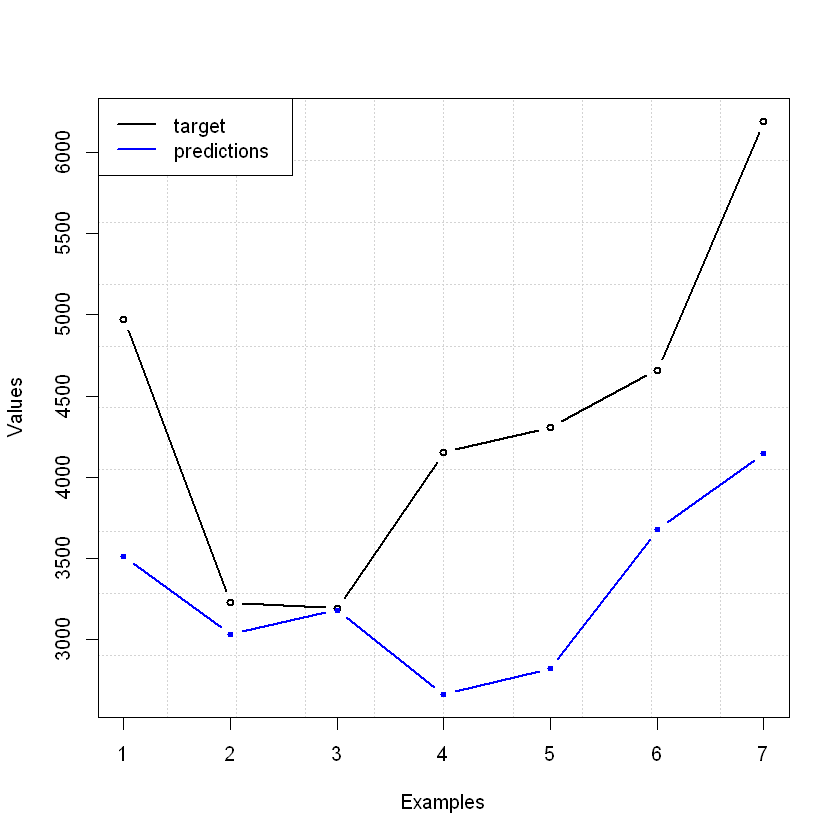

In [53]:
Target = data$all[H$ts]

cat("SMAPE: ",round(mmetric(Target,Pred2,metric="SMAPE"),2),"\n")
cat("MAE: ",round(mmetric(Target,Pred2,metric="MAE"),2),"\n")
cat("NMAE: ",round(mmetric(Target,Pred2,metric="NMAE"),2),"\n")

# last iteration predictions:
mgraph(data$all[H$ts],Pred2,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")))

### Simple Time Series Forecast

[1] "show graph"


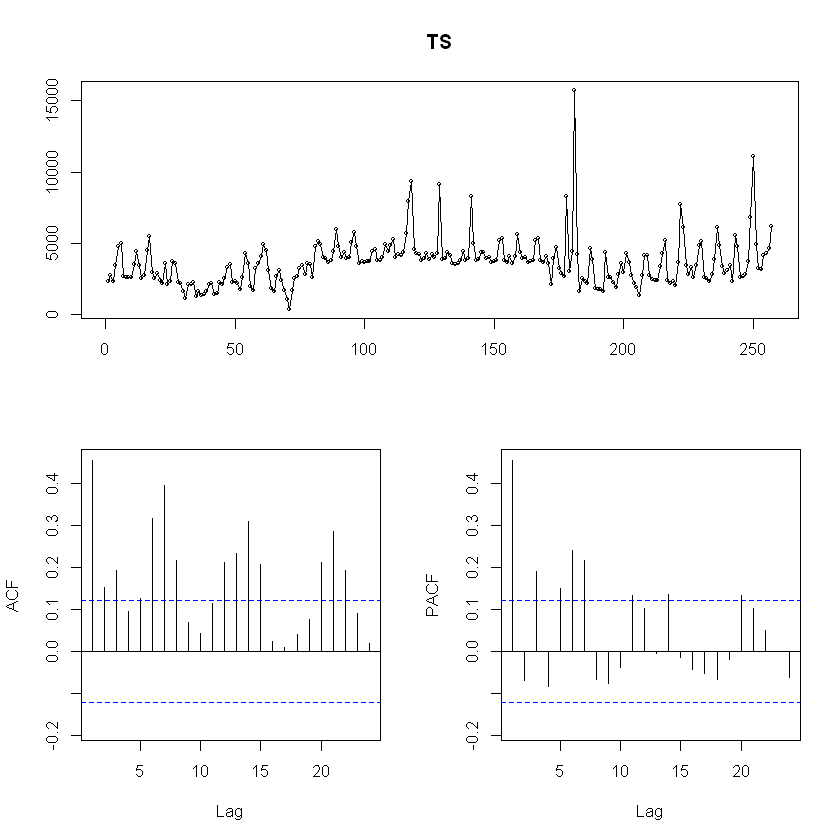

Time Series:
Start = c(1, 1) 
End = c(36, 5) 
Frequency = 7 
  [1]  2332.00  2801.00  2375.00  3447.00  4823.00  4978.00  2706.00  2639.00
  [9]  2647.00  2612.00  3530.00  4440.00  3469.00  2542.00  2779.00  4488.00
 [17]  5506.00  2954.00  2542.00  2892.00  2445.00  2231.00  3617.00  2113.00
 [25]  2363.00  3728.00  3643.00  2249.00  2214.00  1668.00  1121.00  2160.00
 [33]  2107.00  2281.00  1301.00  1628.00  1344.00  1417.00  1616.00  2112.00
 [41]  2210.00  1402.00  1504.00  2262.00  2146.00  2564.00  3318.00  3514.00
 [49]  2258.00  2341.00  2186.00  1794.00  2643.00  4308.00  3593.00  2025.00
 [57]  1746.00  3256.00  3579.00  4101.00  4917.00  4490.00  3109.00  1869.00
 [65]  1625.00  2685.00  3100.00  2418.75  1738.00  1056.25   375.00  1689.00
 [73]  2569.00  2722.00  3290.00  3494.00  2822.00  3620.00  3512.00  2643.00
 [81]  4783.00  5136.00  4911.00  4054.00  3963.00  3709.00  3847.00  4448.00
 [89]  5963.00  4818.00  4028.00  4381.00  3926.00  4063.00  5069.00  5762.00
 [9

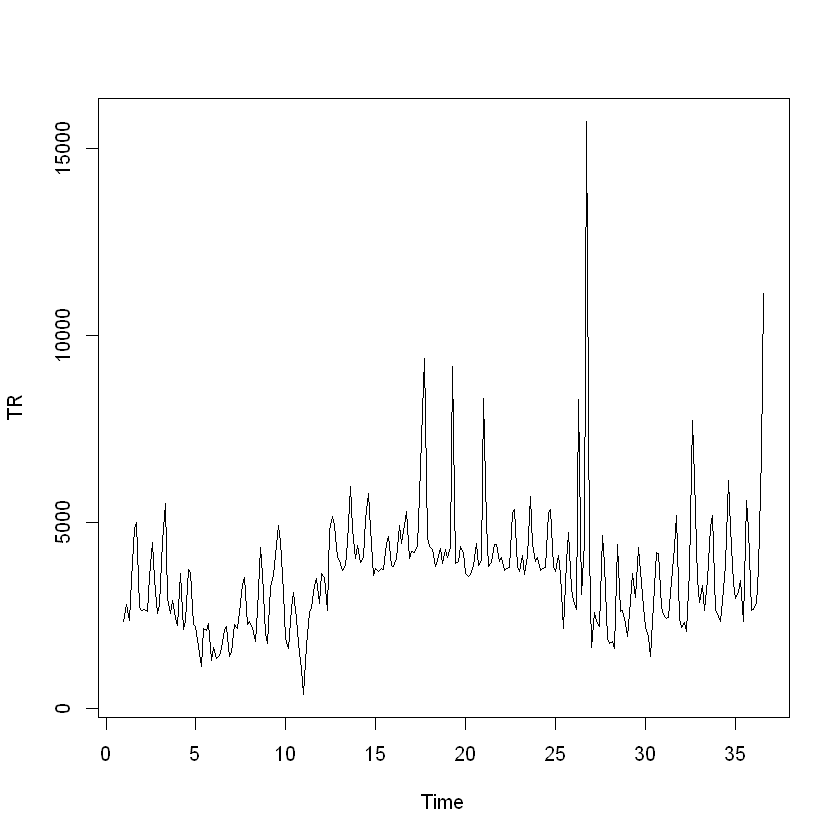

In [159]:
TS = data$all

K=7 # TS period (daily)
print("show graph")
tsdisplay(TS)

L=length(TS)
NTS=K # number of predictions
H=NTS # from 1 to H ahead predictions

# --- this portion of code uses forecast library, which assumes several functions, such as forecast(), and uses a ts object 
# --- note: the forecast library works differently than rminer
# time series monthly object, frequency=K 
# this time series object only includes TRAIN (older) data:
LTR=L-H
# start means: year of 1949, 1st month (since frequency=K=12).
# according to the ts function documentation: frequency=7 assumes daily data, frequency=4 or 12 assumes quarterly and monthly data
TR=ts(TS[1:LTR],frequency=K) # start means: year of 1949, 1st month (since frequency=K=12).
# show the in-sample (training data) time series:
plot(TR)
print(TR)

# target predictions:
Y=TS[(LTR+1):L]

      lag7            lag6            lag5            lag4      
 Min.   :  375   Min.   :  375   Min.   :  375   Min.   :  375  
 1st Qu.: 2564   1st Qu.: 2565   1st Qu.: 2565   1st Qu.: 2578  
 Median : 3625   Median : 3636   Median : 3636   Median : 3636  
 Mean   : 3628   Mean   : 3638   Mean   : 3640   Mean   : 3643  
 3rd Qu.: 4304   3rd Qu.: 4312   3rd Qu.: 4312   3rd Qu.: 4312  
 Max.   :15735   Max.   :15735   Max.   :15735   Max.   :15735  
      lag3            lag2            lag1             y        
 Min.   :  375   Min.   :  375   Min.   :  375   Min.   :  375  
 1st Qu.: 2578   1st Qu.: 2578   1st Qu.: 2578   1st Qu.: 2578  
 Median : 3655   Median : 3655   Median : 3655   Median : 3667  
 Mean   : 3646   Mean   : 3644   Mean   : 3643   Mean   : 3657  
 3rd Qu.: 4312   3rd Qu.: 4308   3rd Qu.: 4308   3rd Qu.: 4312  
 Max.   :15735   Max.   :15735   Max.   :15735   Max.   :15735  
[1] 4548.820 3176.593 4393.754 3400.574 4220.388 4392.796 4212.429
MAE: 680.879 


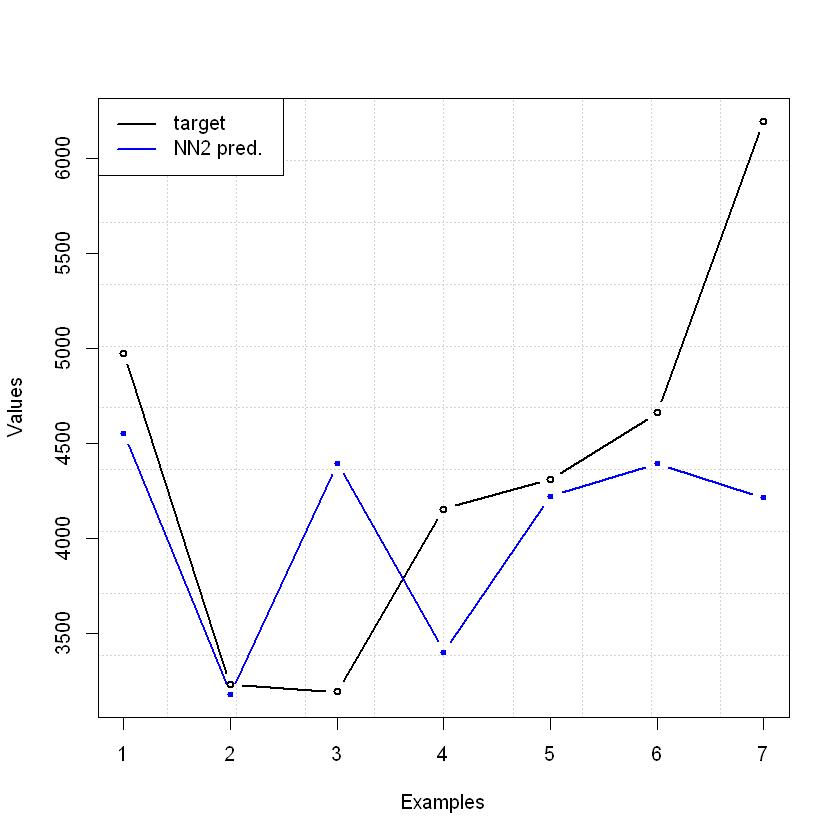

In [160]:
# neural network modeling, via rminer:
d=CasesSeries(TS,c(1:7)) # data.frame from time series (domain knowledge for the 1,12,13 time lag selection)
print(summary(d))
LD=nrow(d) # note: LD < L
hd=holdout(d$y,ratio=NTS,mode="order")
NN2=fit(y~.,d[hd$tr,],model="mlpe")
# multi-step, from 1 to H ahead forecasts:
init=hd$ts[1] # or same as: init=LD-H+1
# for multi-step ahead prediction, the lforecast from rminer should be used instead of predict,
# since predict only performs 1-ahead predictions
F5=lforecast(NN2,d,start=hd$ts[1],horizon=H)
print(F5)
Pred5=F5
mgraph(Y,Pred5,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target","NN2 pred.")))
cat("MAE:",mmetric(Y,Pred5,metric="MAE"),"\n")

[1] 6852.686 4155.948 4244.913 3277.781 3846.433 5787.293 6575.399
MAE: 708.9247 


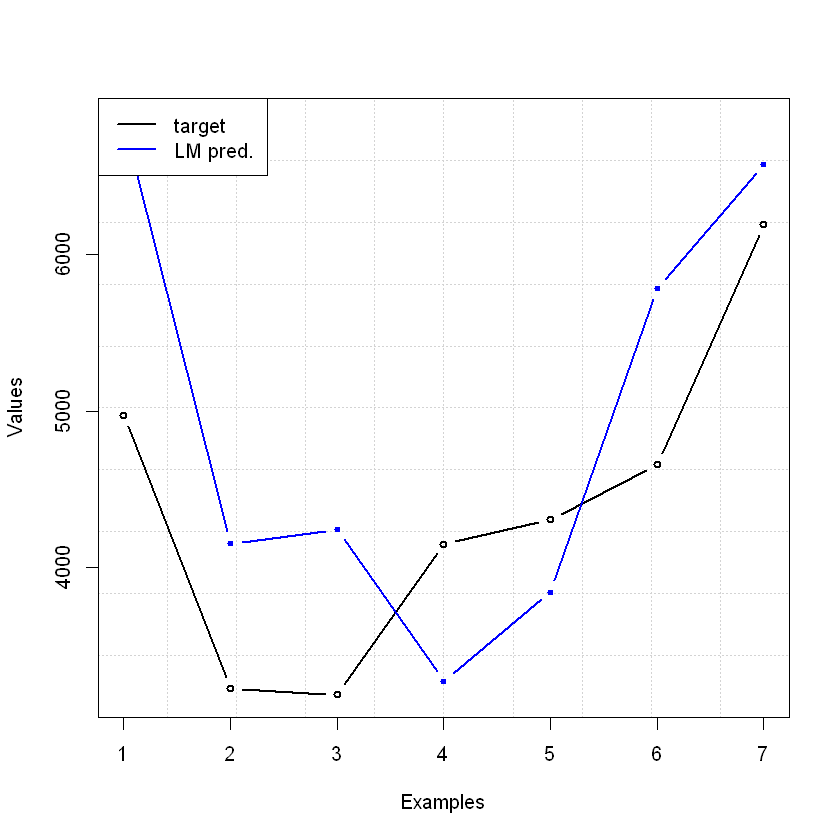

In [107]:
# random forest modeling, via rminer:
LM=fit(y~.,d[hd$tr,],model="lm")
# multi-step, from 1 to H ahead forecasts:
init=hd$ts[1] # or same as: init=LD-H+1
# for multi-step ahead prediction, the lforecast from rminer should be used instead of predict,
# since predict only performs 1-ahead predictions
F6=lforecast(LM,d,start=hd$ts[1],horizon=H)
print(F6)
Pred6=F6
mgraph(Y,Pred6,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target","LM pred.")))
cat("MAE:",mmetric(Y,Pred5,metric="MAE"),"\n")

In [148]:
d1 = data[,1] #coluna all
L = length(d1)
K=7

timelags = c(1:7)
D = CasesSeries(d1,timelags)
YR = diff(range(d1))

In [149]:
H=holdout(data$all,ratio=7,mode="order")
M=fit(y~.,D[H$tr,],model="mlpe") # create forecasting model
Pred=lforecast(M,D,start=(length(H$tr)+1),7)

SMAPE:  12.58 
MAE:  554.64 
NMAE:  18.48 


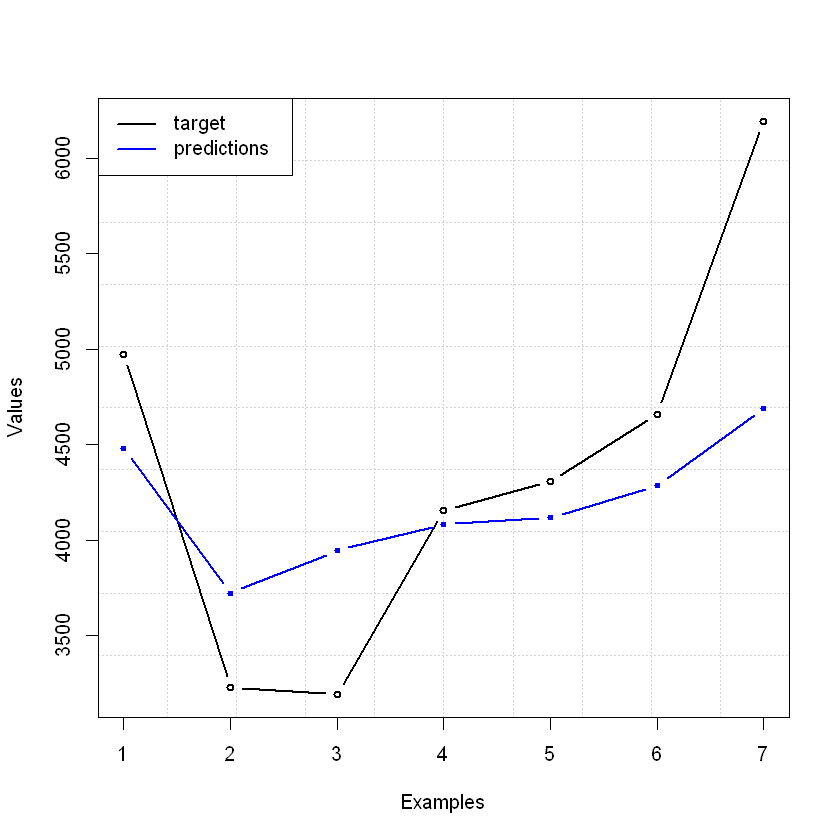

In [150]:
Target = d1[H$ts]

cat("SMAPE: ",round(mmetric(Target,Pred,metric="SMAPE"),2),"\n")
cat("MAE: ",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE: ",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

# last iteration predictions:
mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")))

In [151]:
bind = data.frame(cbind(d1,Pred))

Warning message in cbind(d1, Pred):
"number of rows of result is not a multiple of vector length (arg 2)"

In [154]:
nrow(data)

[1] 257

In [156]:
Pred

[1] 4477.628 3721.513 3944.557 4080.628 4117.422 4285.211 4690.681

In [ ]:
# Ciclo for com as varias configuracoes do metodo fit para descobrir quais sao as melhroes